<a href="https://colab.research.google.com/github/josegoisgit/dadosgov/blob/main/dados_de_governos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bandeiras

1.   Transparência digital
2.   Dados abertos



Informações

https://dados.gov.br/pagina/sobre

https://www.oecd.org/gov/open-government-data-report-9789264305847-en.htm

http://www.oecd.org/gov/digital-government/open-government-data.htm

https://en.wikipedia.org/wiki/Open_by_default

https://theunitedstates.io/licensing

https://www.w3.org/2017/12/odi-study/

https://www.w3.org/TR/vocab-dcat/

In [ ]:
alias_url = {
    'Australia' : 'data.gov.au',
    'Austria' : 'data.gv.at',
    'Belgium' : 'data.gov.be',
    'Brazil'  : 'dados.gov.br',
    'Canada' : 'open.canada.ca',
    'Chile' : 'datos.gob.cl',
    'Colombia' :'datos.gob.co',
    'Denmark' : 'www.digitaliser.dk/cataloues',
    'Dominican Republic' : 'www.datos.gob.do',
    'Estonia' : 'opendata.riik.ee',
    'Finland' : 'avoindata.fi/fi',
    'France' : 'data.gouv.fr',
    'Germany' : 'govdata.de',
    'Greece' : 'data.gov.gr',
    'Ireland' : 'data.gov.ie',
    'Israel' : 'data.gov.il',
    'Italy' : 'dati.gov.it',
    'Japan' : 'data.go.jp',
    'Korea' : 'data.go.kr',
    'Latvia' : 'data.gov.lv',
    'Lithuania' : 'data.gov.lt',
    'Mexico' : 'datos.gob.mx',
    'Netherlands' : 'data.overheid.nl',
    'Norway' : 'data.norge.no',
    'Peru' : 'datosabiertos.gob.pe',
    'Poland' : 'danepubliczene.gov.pl',
    'Portugal' : 'dados.gov.pt',
    'Slovenia' : 'data.gov.si',
    'Spain' : 'datos.gob.es',
    'Sweden' : 'oppnadata.se',
    'Switzeland' : 'opendata.swiss',
    'Czech Republic' : 'data.gov.cz',
    'New Zealand' : 'data.govt.nz',
    'Slovak Republic' : 'data.gov.sk',
    'United Kingdom' : 'data.gov.uk',
    'Uniteds States' : 'data.gov'
}

In [ ]:
'''
<html>
    <body>
        <table>
            <th> table header
            <tr> table row
            <td> table data
            
        </table>
    </body>
</html>
'''

In [ ]:
alias_url = {
    'Brazil'  : 'dados.gov.br',
    'Dominican Republic' : 'www.datos.gob.do',
}

In [2]:
alias = 'Brazil'
hyperlink = 'https://'+alias_url[alias]

In [3]:
query     = 'UFRJ discentes'

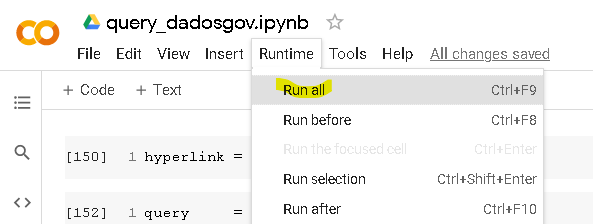

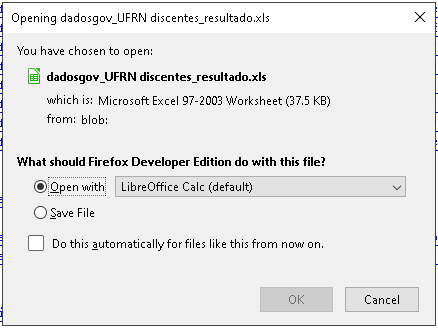

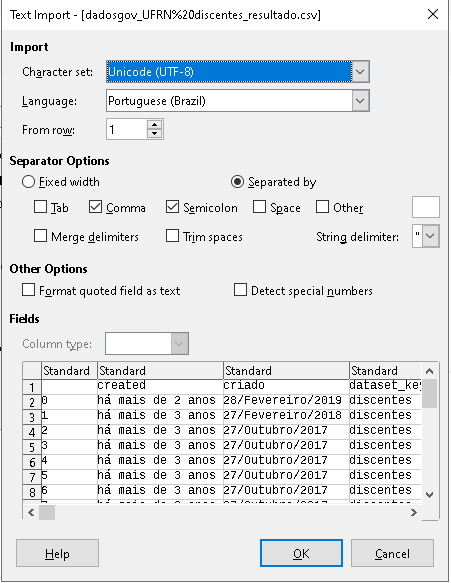

# Módulos e pacotes

## Instalação

In [4]:
!pip install unidecode

     |████████████████████████████████| 245kB 4.3MB/s 


## Importação

In [5]:
import re
import requests
import pandas

from unidecode import unidecode

from itertools import chain
from lxml.etree import HTML

import IPython
import ipywidgets
import google.colab

# Funções

## auxiliares

#### lambdas

##### strip

In [6]:
strip_ = lambda T: set( t.strip() for t in T if t.strip() )
strip  = lambda T: '\n'.join( strip_( T ) ).strip()

##### plain

In [7]:


plain  = lambda I: list( chain.from_iterable( I ) )


## get_url_html

In [8]:
def get_url_html(url):
    requested         = requests.request('GET', url)
    html              = HTML(requested.text)    
    html.nsmap['url'] = url

    return html


In [9]:
#Exemplo:
html = get_url_html('https://docs.python.org')
html.xpath('.//a/@href')

['genindex.html',
 'py-modindex.html',
 'https://www.python.org/',
 '#',
 'whatsnew/3.9.html',
 'whatsnew/index.html',
 'tutorial/index.html',
 'library/index.html',
 'reference/index.html',
 'using/index.html',
 'howto/index.html',
 'installing/index.html',
 'distributing/index.html',
 'extending/index.html',
 'c-api/index.html',
 'faq/index.html',
 'py-modindex.html',
 'genindex.html',
 'glossary.html',
 'search.html',
 'contents.html',
 'bugs.html',
 'https://devguide.python.org/docquality/#helping-with-documentation',
 'about.html',
 'license.html',
 'copyright.html',
 'download.html',
 'https://docs.python.org/3.10/',
 'https://docs.python.org/3.9/',
 'https://docs.python.org/3.8/',
 'https://docs.python.org/3.7/',
 'https://docs.python.org/3.6/',
 'https://docs.python.org/3.5/',
 'https://docs.python.org/2.7/',
 'https://www.python.org/doc/versions/',
 'https://www.python.org/dev/peps/',
 'https://wiki.python.org/moin/BeginnersGuide',
 'https://wiki.python.org/moin/PythonBooks',


## xpath

### contains_clause

In [10]:
def contains_clause(dic, operator='OR'):
    predicados = ["contains(@{k},'{v}')".format(k=k,v=v) for k,v in dic.items()]

    return operator.join(predicados)


### compose_xpath

In [11]:

def compose_xpath( element, attribute, content ):
    dictionary = contains_clause( { attribute : content } )

    str_dict = {
        'element' : element,
        'dictionary' : dictionary 
    }

    return "{element}[{dictionary}]".format(**str_dict)


### get_xnodes

In [12]:

def get_xnodes(html, element, attribute='class', content='', complement=''):
    if complement:
        xnode = html.xpath(compose_xpath(element,attribute,content) + complement)
    else:
        xnode = html.xpath(compose_xpath(element,attribute,content) )
    return xnode if xnode else None


### get_xnode

In [13]:

def get_xnode(html, element, attribute='class', content='', complement=''):
    xnodes = get_xnodes(html, element, attribute, content, complement)
    return xnodes[0] if xnodes else None


## datasets

### get_html_page_count

In [14]:
 
def get_html_page_count(html):
    xnode = get_xnode( html, '//div', 'class', 'pagination' ) 
    
    if xnode is None:
        return 1
    
    pdiv = xnode.xpath( '//li/a/text()' )
    
    def pmax(pdiv):
        V = [1]
        for p in pdiv:
            try:
                v = int(p)
                V.append(v)       
            except:
                continue
        return max(V)    
    return pmax(pdiv)

### get_query_page_count

In [15]:

def get_query_page_count(hyperlink,query):
    html = get_url_html( hyperlink + '/dataset?q=%s' % query)
    return get_html_page_count( html )


### get_html_items_href






In [16]:

def get_html_items_href(html):
    xnodes = get_xnodes( html, './/h3', 'class', 'dataset-heading' , '//a/@href' ) 
    return xnodes


### get_html_dataset

In [17]:

def get_html_dataset(html):    
    article_html = get_xnode(html , '//article')
    
    dataset = dict()
    
    dataset['organization'] = ' '.join([x.strip() for x in get_xnodes(html, './/section','class','module-content','//h1//text()')])
    dataset['title']        = strip( get_xnodes( article_html , 'div/h1/text()') ) 
    dataset['key']          = re.sub('[^\w]','_',unidecode(dataset['title']).lower())
    z = get_xnodes(article_html,'//div','class','notes','//p/text()')
    dataset['text'] = strip(z) if z else ''
    dataset['url']          = get_xnodes( article_html, '//ol', 'class', 'breadcrumb', '//li/a/@href')

    return dataset


### get_html_dataset_license

In [18]:

def get_html_dataset_license(html,hyperlink='https://dados.gov.br'):
    xnode = get_xnode( html, '//section','class','license') 

    if not xnode: return dict(title='NA',href='',text='',logo='')

    license_title = xnode.xpath( './/@title' )
    license_href  = xnode.xpath( './/@href')
    license_text  = [ text.strip() for text in xnode.xpath( './/text()' ) if text.strip() ]
    license_logo  = [ hyperlink + p for p in xnode.xpath( './/img//@src' ) ]
    
    license_dict          = dict()
    license_dict['title'] = license_title
    license_dict['href']  = license_href
    license_dict['text']  = license_text
    license_dict['logo']  = license_logo

    return license_dict


### get_html_dataset_resources_href

In [19]:

def get_html_dataset_resources_href(html):
    return get_xnodes(html,'//a','class','heading','/@href')


### get_html_resource_info





In [20]:

def get_html_resource_info(html):
    
    ths     = get_xnodes( html, '//table', 'class', 'table-condensed','/tbody//th/text()')
    headers = [re.sub('[^\w]','_',unidecode(th.lower())) for th in ths]
    tds     = get_xnodes( html, '//table', 'class', 'table-condensed','/tbody//td')
    data    = [strip(get_xnodes(td, './/text()')).strip() for td in tds]

    info_dict        = {h:d for h,d in zip(headers,data)}
    info_dict['url'] = str(get_xnode( html, '//a','class','resource-url-analytic','/@href'))

    return info_dict

### auxiliares

#### \_\_dir_repr\_\_

In [21]:

def __dir_repr__(variable=dict,pattern=''):
    dir_type_dict = dict()
    
    for attribute in dir(variable):
        if not re.findall(pattern, attribute): continue
        value = getattr(variable,attribute)
        typename = type(value).__name__
        
        if typename not in dir_type_dict:
            dir_type_dict[typename] = [(attribute,value)]
        else:
            dir_type_dict[typename].append((attribute,value))
        
    for key, items in dir_type_dict.items():
        print(key)
        print()
        for attribute,value in items:
            print('\t',attribute)
        print()
        #print('{: <30s}{:<20s}'.format(typename, attribute))


#### show_url

In [22]:

def show_url( url=hyperlink):
    dadosgov_frame = IPython.display.IFrame(src=url,width='100%',height='500px')
    display(dadosgov_frame)
    return


#### query_site

In [23]:

def query_site( query=''):
    query = query.lower()
    query = unidecode.unidecode(query)
    query = re.sub('[^a-z\s\'\"]','',query)
    query = re.sub('\s+','+',query)
    
    url = hyperlink + '/dataset?q=%s' % query
    dadosgov_frame = IPython.display.IFrame(src=url,width='100%',height='500px')
    display(dadosgov_frame)
    return dadosgov_frame



#### lambdas

##### get_query_page_url

In [24]:
get_query_page_url   = lambda h, q, p : h + '/dataset' + '?q=' + q + '&page=' + str(p)

##### get_query_page_html

In [25]:
get_query_page_html  = lambda h, q, p : get_url_html( get_query_page_url( h, q, p ) )


##### get_query_page_items

In [26]:
get_query_page_items = lambda h, q, p : get_html_items_href( get_query_page_html( h, q, p ) )


##### get_query_items_href

In [27]:
get_query_items_href = lambda h, q    : plain([ get_query_page_items( h, q, p+1 ) for p in range( get_query_page_count( h, q ) ) ])


# Leitura

## argumentos

In [28]:
query   = re.sub('[^\w]',' ',unidecode(query))
query   = re.sub('\s+'  ,' ',query)
query   = re.sub('\s'   ,'+',query)

query

'UFRN+discentes'

In [29]:
query_url = get_query_page_url(hyperlink,query,1)

In [30]:
show_url(query_url)

## visualização

In [31]:
resources = []
items_href = get_query_items_href(hyperlink,query)

In [32]:
ih = 0
 
print(hyperlink + items_href[ih])
show_url(hyperlink + items_href[ih])

https://dados.gov.br/dataset/discentes


## arquivos

In [33]:
import time

In [34]:
import pandas
resources = []
for item_href in items_href:
    item_url = hyperlink + item_href
 
    print('\n\n\t', item_url, end='\n\n')
    dataset_html   = get_url_html( item_url )
 
    dataset        = get_html_dataset( dataset_html )
    license        = get_html_dataset_license ( dataset_html )
    resources_href = get_html_dataset_resources_href( dataset_html )
 
    for resource_href in resources_href:
        resource_url  = hyperlink + resource_href 
 
        resource_html = get_url_html( resource_url )  
        resource_dict = get_html_resource_info(resource_html)
 
        a = 'http://landpage-h.cgu.gov.br/dadosabertos/index.php?url='
        resource_dict['url_out'] = resource_dict['url'].replace(a,'') if resource_dict['url'] else None        

        resource_dict.update({('dataset_'+k):v for k,v in dataset.items()})
        resource_dict.update({('license_'+k):v for k,v in license.items()})
 
        resource_dict['havested'] = time.ctime()
        
        print('\t\t',resource_dict['url_out'], end='\n')
 
        resources.append( resource_dict )



	 https://dados.gov.br/dataset/discentes



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  """


		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv
		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/146b749b-b9d0-49b2-b114-ac6cc82a4051/download/discentes-2018.csv
		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dc732572-a51a-4d4a-a39d-2db37cbe5382/download/discentes-2017.csv
		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016.csv
		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015.csv
		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014.csv
		 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013.csv

# Dados

In [35]:
df_datagov = pandas.DataFrame(resources)

In [36]:
df_datagov = df_datagov[sorted(df_datagov.keys())]

In [37]:
df_datagov.sample(3).T

,29,18,15
created,há mais de 3 anos,há mais de 3 anos,há mais de 1 ano
criado,23/Novembro/2017,24/Novembro/2017,27/Junho/2019
dataset_key,dados_socio_economicos_de_discentes,dados_socio_economicos_de_discentes,dados_socio_economicos_de_discentes
dataset_organization,Universidade Federal do Rio Grande do Norte - ...,Universidade Federal do Rio Grande do Norte - ...,Universidade Federal do Rio Grande do Norte - ...
dataset_text,Apresenta os dados sócio-econômicos dos discen...,Apresenta os dados sócio-econômicos dos discen...,Apresenta os dados sócio-econômicos dos discen...
dataset_title,Dados Sócio-Econômicos de Discentes,Dados Sócio-Econômicos de Discentes,Dados Sócio-Econômicos de Discentes
dataset_url,"[/, /organization, /organization/universidade-...","[/, /organization, /organization/universidade-...","[/, /organization, /organization/universidade-..."
datastore_active,True,True,True
format,CSV,CSV,CSV
formato,CSV,CSV,CSV


In [38]:
FN = lambda ext='json' : './dadosgov_{}_{}_query.{}'.format(alias,query.replace('+','_'), ext)
 
 
df_datagov.to_json(FN('json'))
df_datagov.to_csv(FN('csv'))
df_datagov.to_excel(FN('xls'))
for fn in ['json', 'csv', 'xls']:
    google.colab.files.download(FN(fn))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Leitura de CSV

In [86]:
if not query == 'UFRN+discentes':
    df_datagov['not default']

KeyError: ignored

In [88]:
import os

In [89]:
fext_dict = dict()
for url in df_datagov['url_out']:
    _,ext = os.path.splitext(url)
    if not ext in fext_dict:
        fext_dict[ext] = []
    else:
        fext_dict[ext].append(url)        

In [90]:
df_csv = pandas.read_csv(fext_dict['.csv'][0],sep=';')

In [91]:
df_csv

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20180057132,AADRIAN ANDREW COSTA BORGES,M,2018,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000034.0,ESTATÍSTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1,20183023601,ABDA ROCHA PINHEIRO,F,2018,1.0,PROCESSO SELETIVO,REGULAR,TRANCADO,T,TÉCNICO,5401.0,TÉCNICO DE MÚSICA (REGÊNCIA),PRESENCIAL,284.0,ESCOLA DE MÚSICA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,20182042550,ABDIEL DE LIRA ROLIM,M,2018,2.0,PROCESSO SELETIVO,REGULAR,ATIVO,L,LATO SENSU,128492008.0,ESPECIALIZAÇÃO EM PRECEPTORIA EM SAÚDE,A DISTÂNCIA,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
3,20180107403,ABDON FRANCISCO SANTANA NETO,M,2018,2.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,20182033882,ABDON MOREIRA LUSTOSA,M,2018,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,L,LATO SENSU,128492008.0,ESPECIALIZAÇÃO EM PRECEPTORIA EM SAÚDE,A DISTÂNCIA,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241,20185013865,ZIWEN ZHAO,F,2018,2.0,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,87093990.0,CURSO DE CONVERSAÇÃO EM LÍNGUA PORTUGUESA PARA...,PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
20242,20185013168,ZIWEN ZHAO,F,2018,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,F,FORMAÇÃO COMPLEMENTAR,86980524.0,CURSO DE PORTUGUÊS LÍNGUA ESTRANGEIRA - BÁSICO,PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
20243,20182005064,ZOILA GUETHON SILVA,F,2018,1.0,NAO INFORMADO,REGULAR,CONCLUÍDO,L,LATO SENSU,116293682.0,ESPECIALIZAÇÃO EM SAÚDE DA FAMÍLIA,A DISTÂNCIA,4890.0,FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
20244,20182004227,ZURAMY RODRIGUEZ CERVANTES,F,2018,1.0,NAO INFORMADO,REGULAR,CONCLUÍDO,L,LATO SENSU,116293682.0,ESPECIALIZAÇÃO EM SAÚDE DA FAMÍLIA,A DISTÂNCIA,4890.0,FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


<BarContainer object of 3 artists>

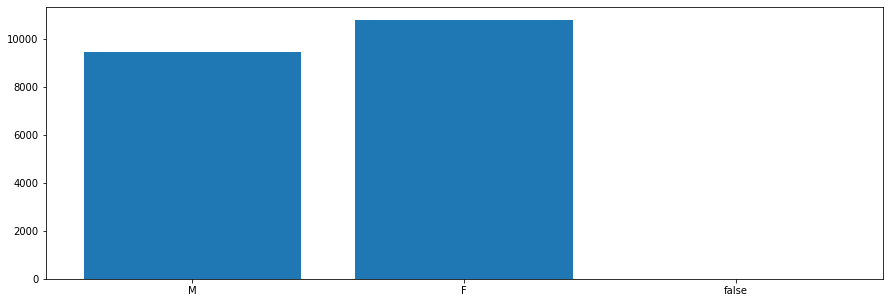

In [92]:
from matplotlib import pyplot

from collections import Counter

df_csv_sexo_counter = Counter( df_csv.sexo.values )

figura_csv = pyplot.figure(1,(15,5)) # 1 ua = 72 px

pyplot.bar(df_csv_sexo_counter.keys(), df_csv_sexo_counter.values())


In [93]:
for k in df_datagov.dataset_key.unique():
    print(k)

discentes
dados_complementares_de_discentes
dados_socio_economicos_de_discentes


In [94]:
id_discentes = df_datagov['dataset_key'] == 'discentes'

In [95]:
df_discentes = df_datagov[id_discentes]
df_discentes

,created,criado,dataset_key,dataset_organization,dataset_text,dataset_title,dataset_url,datastore_active,format,formato,havested,id,last_modified,licenca,license_href,license_logo,license_text,license_title,package_id,position,revision_id,state,ultima_atualizacao,url,url_out,webstore_last_updated,webstore_url
0,há mais de 2 anos,28/Fevereiro/2019,discentes,Universidade Federal do Rio Grande do Norte - ...,Relação dos discentes da UFRN.,Discentes,"[/, /organization, /organization/universidade-...",True,CSV,CSV,Tue Apr 27 07:18:46 2021,a55aef81-e094-4267-8643-f283524e3dd7,12 dias atrás,Other (Open),[http://opendefinition.org/okd/],[https://dados.gov.br/base/images/od_80x15_blu...,"[Licença, Other (Open)]",[Este conjunto de dados satisfaz a Definição d...,554c2d41-cfce-4278-93c6-eb9aa49c5d16,NaN,fc0d7790-9da2-4e00-87fe-d5c73128a65b,active,14/Abril/2021,http://landpage-h.cgu.gov.br/dadosabertos/inde...,http://dados.ufrn.br/dataset/554c2d41-cfce-427...,None,None
1,há mais de 3 anos,27/Fevereiro/2018,discentes,Universidade Federal do Rio Grande do Norte - ...,Relação dos discentes da UFRN.,Discentes,"[/, /organization, /organization/universidade-...",True,CSV,CSV,Tue Apr 27 07:18:46 2021,146b749b-b9d0-49b2-b114-ac6cc82a4051,19 dias atrás,Other (Open),[http://opendefinition.org/okd/],[https://dados.gov.br/base/images/od_80x15_blu...,"[Licença, Other (Open)]",[Este conjunto de dados satisfaz a Definição d...,554c2d41-cfce-4278-93c6-eb9aa49c5d16,1,fc0d7790-9da2-4e00-87fe-d5c73128a65b,active,7/Abril/2021,http://landpage-h.cgu.gov.br/dadosabertos/inde...,http://dados.ufrn.br/dataset/554c2d41-cfce-427...,None,None
2,há mais de 3 anos,27/Outubro/2017,discentes,Universidade Federal do Rio Grande do Norte - ...,Relação dos discentes da UFRN.,Discentes,"[/, /organization, /organization/universidade-...",NaN,CSV,CSV,Tue Apr 27 07:18:47 2021,dc732572-a51a-4d4a-a39d-2db37cbe5382,13 dias atrás,Other (Open),[http://opendefinition.org/okd/],[https://dados.gov.br/base/images/od_80x15_blu...,"[Licença, Other (Open)]",[Este conjunto de dados satisfaz a Definição d...,554c2d41-cfce-4278-93c6-eb9aa49c5d16,2,fc0d7790-9da2-4e00-87fe-d5c73128a65b,active,14/Abril/2021,http://landpage-h.cgu.gov.br/dadosabertos/inde...,http://dados.ufrn.br/dataset/554c2d41-cfce-427...,None,None
3,há mais de 3 anos,27/Outubro/2017,discentes,Universidade Federal do Rio Grande do Norte - ...,Relação dos discentes da UFRN.,Discentes,"[/, /organization, /organization/universidade-...",NaN,CSV,CSV,Tue Apr 27 07:18:48 2021,7d2fa5b3-743f-465f-8450-91719b34a002,13 dias atrás,Other (Open),[http://opendefinition.org/okd/],[https://dados.gov.br/base/images/od_80x15_blu...,"[Licença, Other (Open)]",[Este conjunto de dados satisfaz a Definição d...,554c2d41-cfce-4278-93c6-eb9aa49c5d16,3,fc0d7790-9da2-4e00-87fe-d5c73128a65b,active,14/Abril/2021,http://landpage-h.cgu.gov.br/dadosabertos/inde...,http://dados.ufrn.br/dataset/554c2d41-cfce-427...,None,None
4,há mais de 3 anos,27/Outubro/2017,discentes,Universidade Federal do Rio Grande do Norte - ...,Relação dos discentes da UFRN.,Discentes,"[/, /organization, /organization/universidade-...",True,CSV,CSV,Tue Apr 27 07:18:48 2021,e2b5b843-4f58-497e-8979-44daf8df8f94,12 dias atrás,Other (Open),[http://opendefinition.org/okd/],[https://dados.gov.br/base/images/od_80x15_blu...,"[Licença, Other (Open)]",[Este conjunto de dados satisfaz a Definição d...,554c2d41-cfce-4278-93c6-eb9aa49c5d16,4,6fbfac0e-2436-4e00-a0e4-f7d8eecc8214,active,14/Abril/2021,http://landpage-h.cgu.gov.br/dadosabertos/inde...,http://dados.ufrn.br/dataset/554c2d41-cfce-427...,None,None
5,há mais de 3 anos,27/Outubro/2017,discentes,Universidade Federal do Rio Grande do Norte - ...,Relação dos discentes da UFRN.,Discentes,"[/, /organization, /organization/universidade-...",True,CSV,CSV,Tue Apr 27 07:18:49 2021,6c23a430-9a7c-4d0f-9602-1d5d97d40e6a,14 dias atrás,Other (Open),[http://opendefinition.org/okd/],[https://dados.gov.br/base/images/od_80x15_blu...,"[Licença, Other (Open)]",[

In [106]:
os.path.splitext

<module 'os' from '/usr/lib/python3.7/os.py'>

In [115]:
os.path.splitext(url)[1] == '.pdf'

True

In [146]:
discentes = []
print('discentes',end='\n\n')
for url in df_discentes['url_out'].values:
    print('\t',url)
    if os.path.splitext(url)[1] == '.pdf': continue
    _ = pandas.read_csv(url,sep=';',decimal=',')
    if len(discentes):
        discentes.append( _ )
    else:
        discentes = [ _ ]


discentes

	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv
	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/146b749b-b9d0-49b2-b114-ac6cc82a4051/download/discentes-2018.csv
	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dc732572-a51a-4d4a-a39d-2db37cbe5382/download/discentes-2017.csv
	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016.csv
	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015.csv
	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014.csv
	 http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013

In [147]:
discentes = pandas.concat(discentes,axis=0)

In [154]:
gb = discentes[['ano_ingresso','sexo','matricula']].groupby(['ano_ingresso','sexo'])

In [179]:
gb['matricula'].count().items()

In [183]:
tuple( gb['matricula'].count().items() )  # tuplas de ( tupla de ( tupla de ano e sexo ) e contagem )

(((2009, 'F'), 5391),
 ((2009, 'M'), 5208),
 ((2010, 'F'), 7832),
 ((2010, 'M'), 7831),
 ((2010, 'false'), 2),
 ((2011, 'F'), 7284),
 ((2011, 'M'), 7014),
 ((2011, 'false'), 4),
 ((2012, 'F'), 8716),
 ((2012, 'M'), 8784),
 ((2012, 'false'), 8),
 ((2013, 'F'), 11660),
 ((2013, 'M'), 10841),
 ((2013, 'false'), 9),
 ((2014, 'F'), 10159),
 ((2014, 'M'), 10444),
 ((2014, 'false'), 3),
 ((2015, 'F'), 8963),
 ((2015, 'M'), 10239),
 ((2015, 'false'), 5),
 ((2016, 'F'), 8569),
 ((2016, 'M'), 9656),
 ((2016, 'false'), 6),
 ((2017, 'F'), 10495),
 ((2017, 'M'), 12379),
 ((2017, 'false'), 8),
 ((2018, 'F'), 10790),
 ((2018, 'M'), 9455),
 ((2018, 'false'), 1),
 ((2019, 'F'), 7396),
 ((2019, 'M'), 8626),
 ((2019, 'false'), 4),
 ((2020, 'F'), 8341),
 ((2020, 'M'), 8526))

In [184]:
ano_sexo, contagem = zip(*gb['matricula'].count().items())

In [186]:
ano, sexo = zip(*ano_sexo)

In [203]:
ano = numpy.array(ano)
contagem = numpy.array(contagem)

In [204]:
id_m = [s == 'M' for s in sexo]

In [205]:
id_f = [s == 'F' for s in sexo]

In [206]:
id_na = [s=='false' for s in sexo]

array([2009, 2009, 2010, 2010, 2010, 2011, 2011, 2011, 2012, 2012, 2012,
       2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016,
       2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019, 2020,
       2020])

In [214]:
pyplot.close(3)

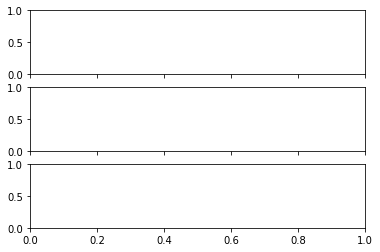

In [224]:
axs[0]

In [239]:
pyplot.bar?

In [240]:
pyplot.plot?

ValueError: ignored

<Figure size 1440x720 with 0 Axes>

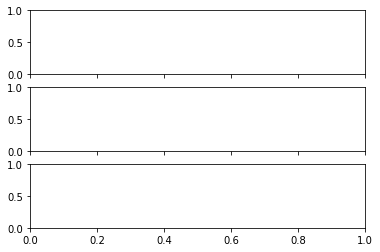

In [241]:
figura_dois = pyplot.figure(2,(20,10))
axs = pyplot.subplots(3,1,sharex=True,sharey=True)
for ax,id in zip(axs[1],[id_m,id_f,id_na]):
    pyplot.bar(x=ano[id_m],height=contagem[id_m],axes=ax)
